Notes from the time sires course from Kaggle

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "book_sales.csv",
    index_col='Date',
    parse_dates=['Date'], 
).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [4]:
df.index

DatetimeIndex(['2000-04-01', '2000-04-02', '2000-04-03', '2000-04-04',
               '2000-04-05', '2000-04-06', '2000-04-07', '2000-04-08',
               '2000-04-09', '2000-04-10', '2000-04-11', '2000-04-12',
               '2000-04-13', '2000-04-14', '2000-04-15', '2000-04-16',
               '2000-04-17', '2000-04-18', '2000-04-19', '2000-04-20',
               '2000-04-21', '2000-04-22', '2000-04-23', '2000-04-24',
               '2000-04-25', '2000-04-26', '2000-04-27', '2000-04-28',
               '2000-04-29', '2000-04-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

This series records the number of hardcover book sales at a retail store over 30 days. Notice that we have a single column of observations Hardcover with a time index Date.

### Linear regression

The linear regression algorithm learns how to make a weighted sum from its input features. For two features, we would have:

```
target = weight_1 * feature_1 + weight_2 * feature_2 + bias
```

During training, the regression algorithm learns values for the parameters `weight_1`, `weight_2`, and `bias` that best fit the target. (This algorithm is often called ordinary least squares since it chooses values that **minimize the squared error** between the target and the predictions.) **The weights** are also called *regression coefficients* and the **bias** is also called the *intercept* because it tells you where the graph of this function crosses the y-axis.

There are two kinds of features unique to time series: time-step features and lag features. Time-step features are features we can derive directly from the time index. 
+ The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

In [3]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Linear regression with the time dummy produces the model:

```
target = weight * time + bias
```

The time dummy then lets us fit curves to time series in a time plot, where Time forms the x-axis.



C:\Users\Usuario\AppData\Local\Temp\ipykernel_17084\1803034033.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


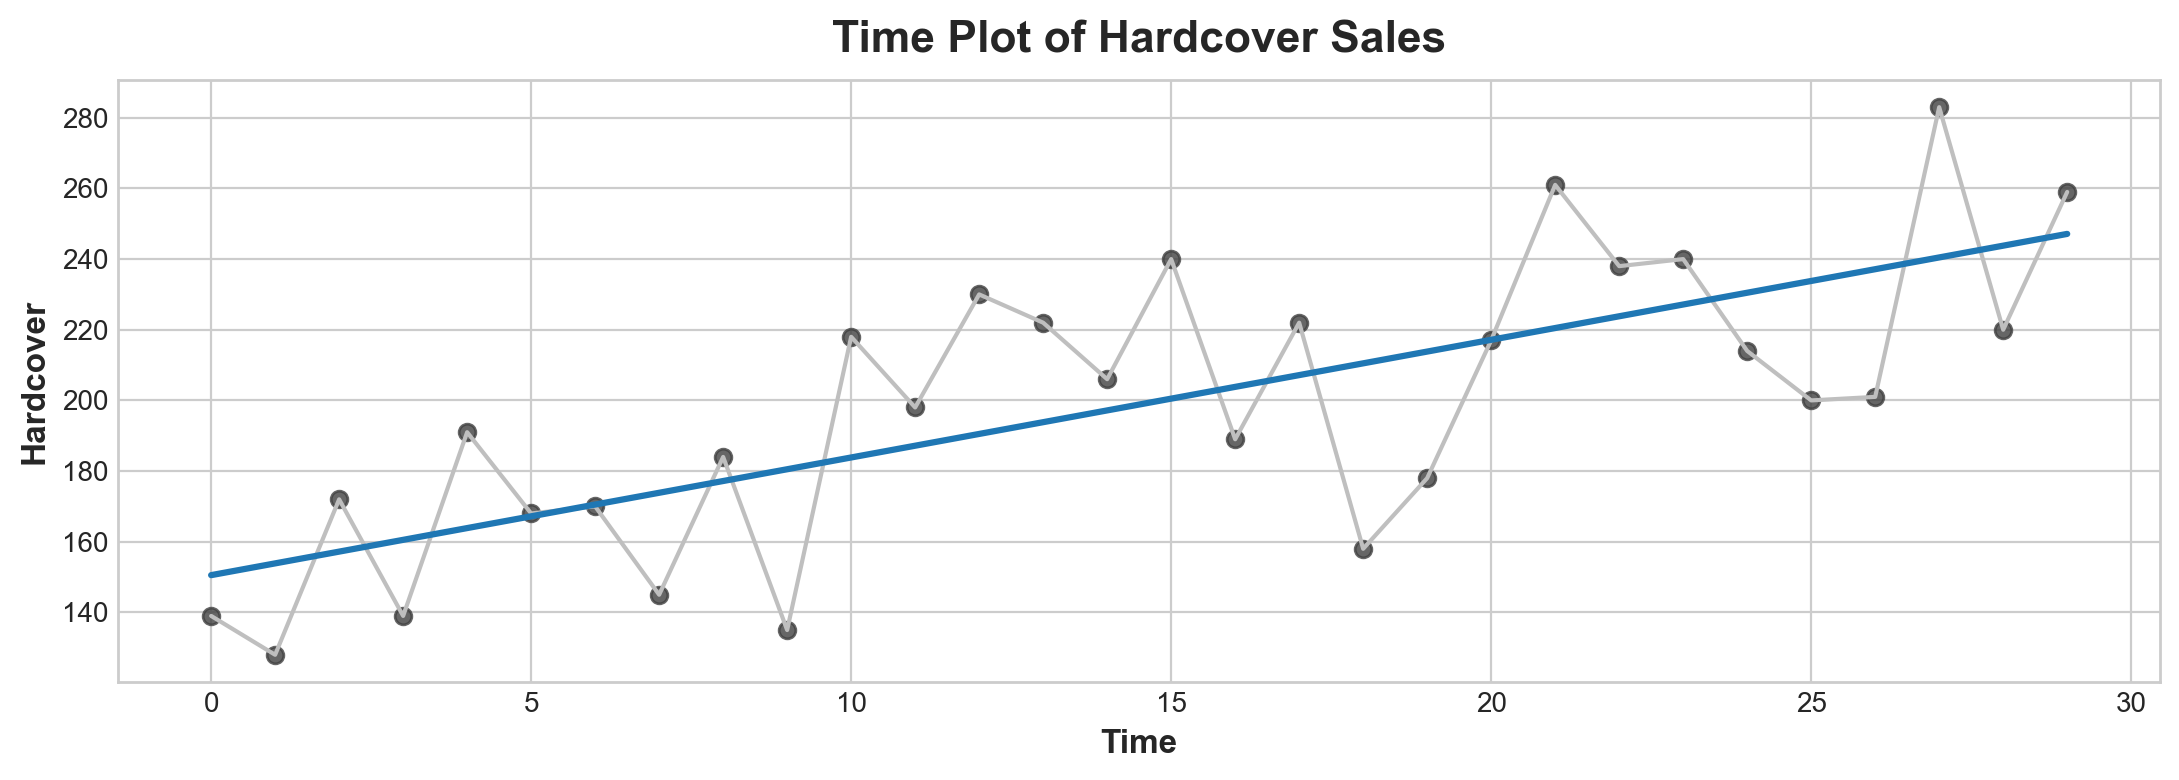

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');


**Lag features**

To make a *lag feature* we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

In [5]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Linear regression with a lag feature produces the model:

```
target = weight * lag + bias
```

So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous observation.



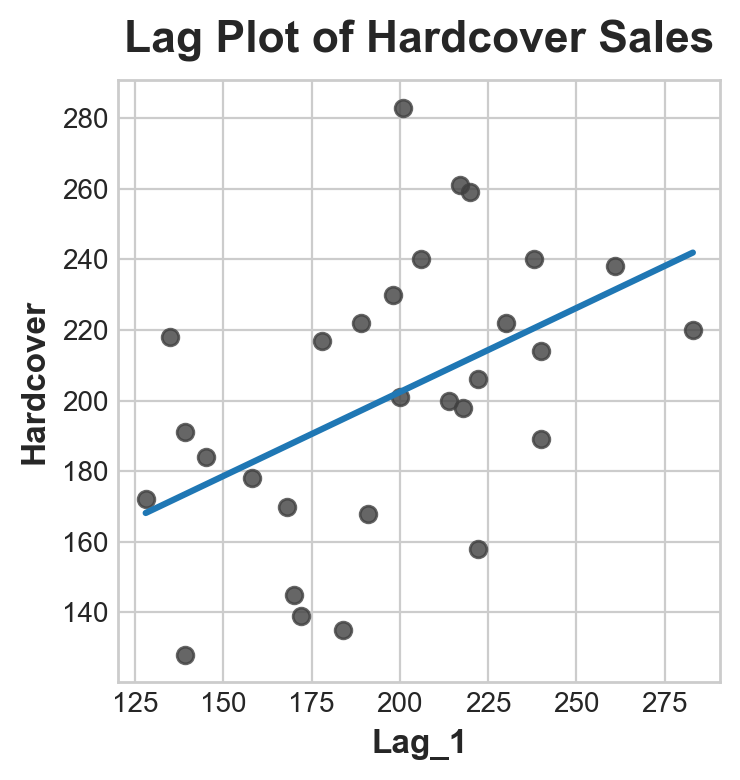

In [6]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

## Example - tunnel traffic 

The next is an example of linear regression to time-step features and lag features.